__About Data:__
Data was collected using an app (EC Taximeter - http://www.ectaximeter.com/) which customers can use to track their taxi/cab travel; users need to manually start their ride in app and end it after reaching destination. This was done with an idea to give users ability to track their taxi ride and compare cost provided by this app against taxi company's bill.

EC Taximeter: *"Run a taximeter in your device and verify the cost of your ride"* https://www.youtube.com/watch?v=zcoWiIzp5mE

Kaggle host: *"The data is not completely clean, many users forget to turn off the taximeter when done with the route. Hence, we encourage data scientist to explore it and trim the data a little bit"*



__Assignment:__
*"Let’s assume you are a passenger in the city of Quito, Ecuador and you would like to know how long you will be stuck in traffic jam."*

#Task: Based on the data in the city of Quito, how well can the trip waiting time be predicted based on time, locations and other features?
    - The waiting time is denoting how long a taxi was waiting at stop lights and in traffic.


__Dataset:__ uio_clean.csv - the dataset contains information of routes in Quito Ecuador

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date


import random
random.seed(321)

In [3]:
#load the data -information of routes in Quito Eucador
df_trips = pd.read_csv('uio_clean.csv')
df_trips.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
1,2,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456
2,3,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314


In [4]:
#structure of the dataset
display(df_trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 12 columns):
id                    32366 non-null int64
vendor_id             32366 non-null object
pickup_datetime       32366 non-null object
dropoff_datetime      32366 non-null object
pickup_longitude      32366 non-null float64
pickup_latitude       32366 non-null float64
dropoff_longitude     32366 non-null float64
dropoff_latitude      32366 non-null float64
store_and_fwd_flag    32366 non-null object
trip_duration         32366 non-null int64
dist_meters           32366 non-null int64
wait_sec              32366 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 3.0+ MB


None

In [6]:
df_trips.shape

(32366, 12)

In [9]:
df_trips.trip_duration .nunique()

7009

In [8]:
df_trips.wait_sec.nunique()

3327

In [13]:
df_trips.vendor_id.value_counts()

Quito                     31875
Quito Cabify Lite           400
Quito Cabify Executive       88
Quito UberX                   3
Name: vendor_id, dtype: int64

In [22]:
df_trips.dist_meters.nunique()

12960

In [18]:
df_trips.vendor_id.nunique()

4

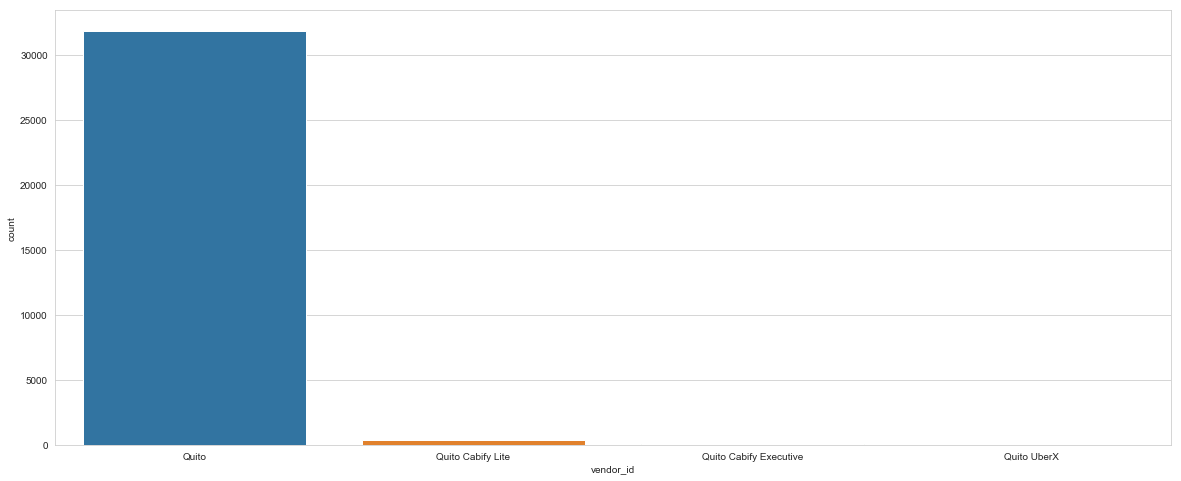

In [23]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.countplot(x="vendor_id",data=df_trips)

__Observation:__ <font color=blue> There are 32366 ride entries; all columns in dataframe has 32366 non-null data entries. </font>

__Dataset:__
id - a unique identifier for each trip<br>
vendor_id - the type of fare entered by the user (taxi, Uber, Cabify)<br>
pickup_datetime - date and time when the meter was engaged<br>
dropoff_datetime - date and time when the meter was disengaged<br>
pickup_longitude - the longitude where the meter was engaged<br>
pickup_latitude - the latitude where the meter was engaged<br>
dropoff_longitude - the longitude where the meter was disengaged<br>
dropoff_latitude - the latitude where the meter was disengaged<br>
store_and_fwd_flag - Set always to N<br>
trip_duration - duration of the trip in seconds<br>
dist_meters - the distance of the trip in meters<br>
wait_sec - the time the car was completely stopped during the trip or waiting time in seconds<br>

__Target Field:__
wait_sec

In [24]:
#id - a unique identifier for each trip
#store_and_fwd_flag - Set always to N
df_trips.store_and_fwd_flag.unique()

array(['N'], dtype=object)

In [27]:
#can drop this column and id column (which is just a unique identifier for each tripS)
#this column does not hold of any importance in the analysis hence can be dropped.
df_trips.drop(['id', 'store_and_fwd_flag'], axis = 1, inplace=True)
df_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
0,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,2025,24228,346
1,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,1390,16680,456
2,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,130317,1987,290
3,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,1933,25146,302
4,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314


In [25]:
#vendor_id - the type of fare entered by the user (taxi, Uber, Cabify)
df_trips.vendor_id.value_counts()

Quito                     31875
Quito Cabify Lite           400
Quito Cabify Executive       88
Quito UberX                   3
Name: vendor_id, dtype: int64

__Observation:__ <font color=blue> Out of 32366 trips, only 491 trips have vendor information marked (cabify Lite, cabify Executive, UberX). Either all the other trips (31875) are from a vendor called 'Quito' or just no vendor info available and person who prepared data has substituted city name in vendor field.<br>
    We can omit this field for prediction purpose. </font>

In [28]:
#dropping vendor_id column
df_trips.drop(['vendor_id'], axis = 1, inplace=True)
df_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
0,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,2025,24228,346
1,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,1390,16680,456
2,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,130317,1987,290
3,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,1933,25146,302
4,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314


In [29]:
#pickup_datetime - date and time when the meter was engaged
#dropoff_datetime - date and time when the meter was disengaged
#dataframe has this info as non-null object; need to convert it into datetime   

# convert to datetime
df_trips['pickup_datetime'] = pd.to_datetime(df_trips['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df_trips['dropoff_datetime'] = pd.to_datetime(df_trips['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

__Observation:__ <font color=blue>Since, we are lookng at wait time (the time the car was completely stopped during the trip or waiting time in seconds), it could be mostly due to traffic signal stops. Hence, time of the day and weekday vs weekend could play an important role in wait time prediction. </font>

Need to introduce these additional features in dataset

In [30]:
#Considering pickup date time here
df_trips['pDay'] = df_trips['pickup_datetime'].dt.weekday_name
df_trips['pDayofWeek'] = df_trips['pickup_datetime'].dt.dayofweek
df_trips['pYear'] = df_trips['pickup_datetime'].dt.year
df_trips['pMonth'] = df_trips['pickup_datetime'].dt.month
df_trips['pHour'] = df_trips['pickup_datetime'].dt.hour

#Considering dropoff date time here
df_trips['dDay'] = df_trips['dropoff_datetime'].dt.weekday_name
df_trips['dYear'] = df_trips['dropoff_datetime'].dt.year
df_trips['dMonth'] = df_trips['dropoff_datetime'].dt.month

In [31]:
display(df_trips.groupby(['pYear', 'pMonth']).size())
display(df_trips.groupby(['dYear', 'dMonth']).size())

display(df_trips[df_trips.pYear==2014])
display(df_trips.query('pYear== 2016 & pMonth == 5').head(1))
display(df_trips.query('dYear== 2017 & dMonth == 8').head(1))

pYear  pMonth
2014   12           1
2016   5            3
       6          523
       7         2394
       8         1875
       9         2117
       10        2467
       11        2311
       12        2989
2017   1         3440
       2         1256
       3         2376
       4         2274
       5         2791
       6         2937
       7         2544
       8           68
dtype: int64

dYear  dMonth
2016   6          498
       7         2398
       8         1862
       9         2118
       10        2464
       11        2312
       12        2986
2017   1         3445
       2         1257
       3         2368
       4         2273
       5         2801
       6         2930
       7         2584
       8           70
dtype: int64

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,pDayofWeek,pYear,pMonth,pHour,dDay,dYear,dMonth
22001,2014-12-31 11:24:58,2017-03-21 11:05:50,-78.497111,-0.26871,-78.497123,-0.268737,70026052,1359,52168,Wednesday,2,2014,12,11,Tuesday,2017,3


,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,pDayofWeek,pYear,pMonth,pHour,dDay,dYear,dMonth
257,2016-05-27 06:14:14,2016-09-21 05:43:41,-78.508943,-0.145293,-78.483182,-0.191437,10106967,5883,545,Friday,4,2016,5,6,Wednesday,2016,9


,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,pDayofWeek,pYear,pMonth,pHour,dDay,dYear,dMonth
11100,2017-07-31 11:50:14,2017-08-01 12:07:21,-78.464317,-0.147843,-78.473966,-0.162231,1028,6834,248,Monday,0,2017,7,11,Tuesday,2017,8


__Observation:__ <font color = blue> Found a trip record for year 2014; also, found few trips in 2016 May and few in 2017 August. These seem to be data issues due to appmeter not turned off at proper time. There are few valid transacitions too in Aug-2017; but, going to restrict trips data to be within June-2016 to July-2017 </font>

In [32]:
#dropping invalid records and 2017-Aug transactions

display(df_trips.shape)

d = df_trips[df_trips.pYear== 2014]
df_trips = df_trips[~df_trips.isin(d)].dropna(how='all')

d = df_trips[(df_trips.pYear== 2016) & (df_trips.pMonth == 5)]
df_trips = df_trips[~df_trips.isin(d)].dropna(how='all')

d = df_trips[(df_trips.pYear== 2017) & (df_trips.pMonth == 8)]
df_trips = df_trips[~df_trips.isin(d)].dropna(how='all')


d = df_trips[(df_trips.dYear== 2017) & (df_trips.dMonth == 8)]
df_trips = df_trips[~df_trips.isin(d)].dropna(how='all')

display(df_trips.shape)

(32366, 17)

(32292, 17)

In [33]:
df_trips.pHour.value_counts()

8.0     4361
7.0     4079
9.0     3568
6.0     3502
10.0    3003
11.0    2455
5.0     2399
12.0    2153
1.0     1777
4.0     1765
2.0     1651
3.0     1579
Name: pHour, dtype: int64

__Observation:__ <font color=blue> pickup datetime is in 12 hour format, but there is no AM/PM information. Time of the day information is incomplete without AM/PM data. </font>

In [34]:
df_trips['trip_in_days'] = (df_trips['dropoff_datetime'] - df_trips['pickup_datetime']).dt.days
display(df_trips['trip_in_days'].value_counts())

 0      29689
-1        988
 1        671
 2        202
 3        148
 4         99
 5         61
 6         54
 7         41
 8         29
 10        21
 16        21
 13        19
 12        17
 14        15
 9         15
 11        13
 19        11
 15        11
 21        10
 25        10
 18         9
 20         8
 22         6
 17         6
 31         6
 24         5
 34         5
 32         4
 27         4
        ...  
 65         1
 77         1
 109        1
 285        1
 46         1
-4          1
 39         1
 71         1
 53         1
 87         1
 135        1
 56         1
 54         1
 104        1
 73         1
 89         1
 85         1
 69         1
 42         1
 115        1
 90         1
 356        1
 164        1
 132        1
 100        1
 106        1
 36         1
 43         1
 59         1
 51         1
Name: trip_in_days, Length: 94, dtype: int64

__Observation__: <font color = blue> Found trips that are running for more than a day; again seems to be data issue due to app not being entered with proper dropoff info. Removing these transactions. </font>

In [35]:
display(df_trips.shape)
df_trips = df_trips[df_trips['trip_in_days'] <= 1]
display(df_trips.shape)

(32292, 18)

(31349, 18)

In [36]:
df_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,pDayofWeek,pYear,pMonth,pHour,dDay,dYear,dMonth,trip_in_days
0,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,2025.0,24228.0,346.0,Saturday,5.0,2016.0,9.0,9.0,Saturday,2016.0,9.0,0
1,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,1390.0,16680.0,456.0,Sunday,6.0,2016.0,9.0,4.0,Sunday,2016.0,9.0,0
3,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,1933.0,25146.0,302.0,Sunday,6.0,2016.0,9.0,5.0,Sunday,2016.0,9.0,0
4,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948.0,4625.0,314.0,Sunday,6.0,2016.0,9.0,7.0,Sunday,2016.0,9.0,0
5,2016-08-27 04:19:02,2016-08-27 04:44:12,-78.509202,-0.194839,-78.518764,-0.228794,1510.0,5820.0,630.0,Saturday,5.0,2016.0,8.0,4.0,Saturday,2016.0,8.0,0


In [37]:
#remove trips that have wait time >= trip duration (assumption: trip duration includes wait time)
display(df_trips.shape)
df_trips = df_trips[df_trips.wait_sec <= df_trips.trip_duration]
display(df_trips.shape)

(31349, 18)

(30542, 18)

In [38]:
display(df_trips[df_trips.trip_duration > 24 * 60 * 60].shape)
display(df_trips[df_trips.trip_duration > 24 * 60 * 60].head())

(303, 18)

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,pDayofWeek,pYear,pMonth,pHour,dDay,dYear,dMonth,trip_in_days
96,2016-09-18 01:25:54,2016-09-19 06:01:49,-78.490129,-0.146828,-78.490081,-0.146788,146155.0,22.0,45.0,Sunday,6.0,2016.0,9.0,1.0,Monday,2016.0,9.0,1
196,2016-09-18 11:41:09,2016-09-20 07:31:25,-78.502724,-0.145033,-78.502966,-0.145156,201016.0,8804.0,2975.0,Sunday,6.0,2016.0,9.0,11.0,Tuesday,2016.0,9.0,1
238,2016-09-20 09:31:36,2016-09-21 12:49:17,-78.543856,-0.283540,-78.550590,-0.286444,98261.0,846.0,485.0,Tuesday,1.0,2016.0,9.0,9.0,Wednesday,2016.0,9.0,1
334,2017-04-19 09:11:33,2017-04-21 01:23:09,-78.534041,-0.238856,-78.553388,-0.263553,187896.0,52535.0,18101.0,Wednesday,2.0,2017.0,4.0,9.0,Friday,2017.0,4.0,1
347,2017-04-19 07:55:29,2017-04-21 05:26:15,-78.496503,-0.200706,-78.496372,-0.200753,163847.0,37.0,129.0,Wednesday,2.0,2017.0,4.0,7.0,Friday,2017.0,4.0,1


__Observation:__ <font color=blue> There are still 303 trips where total trip duration exceeds 24 hours; removing these transactions from overall dataset

In [39]:
display(df_trips.shape)
df_trips = df_trips[df_trips.trip_duration < 24 * 60 * 60]
display(df_trips.shape)

(30542, 18)

(30239, 18)

In [40]:
df_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,pDayofWeek,pYear,pMonth,pHour,dDay,dYear,dMonth,trip_in_days
0,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,2025.0,24228.0,346.0,Saturday,5.0,2016.0,9.0,9.0,Saturday,2016.0,9.0,0
1,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,1390.0,16680.0,456.0,Sunday,6.0,2016.0,9.0,4.0,Sunday,2016.0,9.0,0
3,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,1933.0,25146.0,302.0,Sunday,6.0,2016.0,9.0,5.0,Sunday,2016.0,9.0,0
4,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948.0,4625.0,314.0,Sunday,6.0,2016.0,9.0,7.0,Sunday,2016.0,9.0,0
5,2016-08-27 04:19:02,2016-08-27 04:44:12,-78.509202,-0.194839,-78.518764,-0.228794,1510.0,5820.0,630.0,Saturday,5.0,2016.0,8.0,4.0,Saturday,2016.0,8.0,0


In [41]:
df_trips['check_trip_duration'] = (df_trips['dropoff_datetime'] - df_trips['pickup_datetime']).map(lambda x: x.total_seconds()).to_frame()
df_trips['trip_duration_diff'] = np.abs(df_trips['check_trip_duration'].values  - df_trips['trip_duration'].values)
df_trips.trip_duration_diff.value_counts()

1.0        14335
0.0        14328
43200.0      675
43201.0      499
43199.0      212
86399.0       85
86400.0       83
86401.0       22
Name: trip_duration_diff, dtype: int64

__Observation:__ <font color = blue> Trips that start at AM and closes at PM (and viceversa) can be identified using method given above and pickup/dropoff times can be converted to proper AM/PM format. But, there is no good method to convert trips that starts and finish within AM or PM time. Hence, hour of the day cannot be converted to proper AM/PM format and data at souce need to capture this information. </font>

For prediction, we can try feature set with and without hour of the day and compare accuracy to decide on whether to include it for final prediction featureset.

In [42]:
df_trips['avg_speed'] = df_trips['dist_meters'] / df_trips['trip_duration']  # m/sec
df_trips['avg_speed'] = 3.6*df_trips['avg_speed'] # km/hr
df_trips['avg_speed'] = np.round(df_trips['avg_speed'])

#removing trips where average speed comes out to be greater than 100km/hr (data issues)
display(df_trips.shape)
df_trips = df_trips[df_trips.avg_speed < 100]
display(df_trips.shape)

(30239, 21)

(30156, 21)

In [43]:
df_trips.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,...,pYear,pMonth,pHour,dDay,dYear,dMonth,trip_in_days,check_trip_duration,trip_duration_diff,avg_speed
0,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,2025.0,24228.0,346.0,Saturday,...,2016.0,9.0,9.0,Saturday,2016.0,9.0,0,2025.0,0.0,43.0
1,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,1390.0,16680.0,456.0,Sunday,...,2016.0,9.0,4.0,Sunday,2016.0,9.0,0,1390.0,0.0,43.0
3,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,1933.0,25146.0,302.0,Sunday,...,2016.0,9.0,5.0,Sunday,2016.0,9.0,0,1933.0,0.0,47.0
4,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948.0,4625.0,314.0,Sunday,...,2016.0,9.0,7.0,Sunday,2016.0,9.0,0,947.0,1.0,18.0
5,2016-08-27 04:19:02,2016-08-27 04:44:12,-78.509202,-0.194839,-78.518764,-0.228794,1510.0,5820.0,630.0,Saturday,...,2016.0,8.0,4.0,Saturday,2016.0,8.0,0,1510.0,0.0,14.0


In [44]:
df_trips.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDayofWeek,pYear,pMonth,pHour,dYear,dMonth,trip_in_days,check_trip_duration,trip_duration_diff,avg_speed
count,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000
mean,-78.491787,-0.188373,-78.492286,-0.190202,2933.963788,6069.439780,527.410300,2.717967,2016.546060,6.547818,7.080249,2016.546127,6.547818,-0.018802,2452.125547,2530.366096,18.377404
std,0.033681,0.066122,0.035863,0.070886,9643.857108,7900.749404,1837.650523,1.856717,0.497882,3.376767,3.037694,0.497876,3.376669,0.212239,15436.541127,11243.205445,10.629819
min,-79.933237,-2.875814,-79.933136,-2.875482,3.000000,20.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,2016.000000,1.000000,-1.000000,-43084.000000,0.000000,0.000000
25%,-78.505634,-0.217701,-78.505184,-0.219854,499.000000,2215.000000,106.000000,1.000000,2016.000000,4.000000,5.000000,2016.000000,4.000000,0.000000,456.000000,0.000000,12.000000
50%,-78.490039,-0.181925,-78.489996,-0.185658,870.000000,4118.500000,237.000000,3.000000,2017.000000,7.000000,7.000000,2017.000000,7.000000,0.000000,823.000000,1.000000,18.000000
75%,-78.475586,-0.149364,-78.477438,-0.150283,1560.000000,7314.000000,469.000000,4.000000,2017.000000,9.000000,9.000000,2017.000000,9.000000,0.000000,1468.000000,1.000000,24.000000
max,-78.132979,0.866441,-77.710158,0.866759,86235.000000,313103.000000,69278.000000,6.000000,2017.000000,12.000000,12.000000,2017.000000,12.000000,1.000000,124474.000000,86401.000000,99.000000


In [45]:
# quantiles of wait_sec 
# median is around 4 mins
np.quantile(df_trips.wait_sec, [.01, .05, .25, .50, .75, .95, .99])
display(df_trips[df_trips.wait_sec >= 5304].shape)
display(df_trips[df_trips.wait_sec >= 5304].head())

#Trips that have outside of the 99th quantile for trip wait time will unduly skew all of our numbers and results. 
#Let's remove them. This will remove only 302 entries
df_trips = df_trips[df_trips.wait_sec < 5304]

(302, 21)

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDay,...,pYear,pMonth,pHour,dDay,dYear,dMonth,trip_in_days,check_trip_duration,trip_duration_diff,avg_speed
205,2016-09-20 11:04:44,2016-09-21 05:10:27,-78.490715,-0.191313,-78.495391,-0.127586,21943.0,20295.0,20717.0,Tuesday,...,2016.0,9.0,11.0,Wednesday,2016.0,9.0,0,65143.0,43200.0,3.0
209,2016-09-20 03:15:38,2016-09-20 06:41:18,-78.497238,-0.261464,-78.546329,-0.335094,12340.0,41360.0,7289.0,Tuesday,...,2016.0,9.0,3.0,Tuesday,2016.0,9.0,0,12340.0,0.0,12.0
227,2016-09-21 10:18:20,2016-09-21 11:55:08,-78.486975,-0.206149,-78.481575,-0.187870,5809.0,2667.0,5440.0,Wednesday,...,2016.0,9.0,10.0,Wednesday,2016.0,9.0,0,5808.0,1.0,2.0
244,2016-09-21 12:25:02,2016-09-21 02:35:56,-78.489827,-0.111512,-78.504108,-0.137362,7855.0,5187.0,7201.0,Wednesday,...,2016.0,9.0,12.0,Wednesday,2016.0,9.0,-1,-35346.0,43201.0,2.0
264,2016-09-21 06:12:55,2016-09-21 08:20:59,-78.502050,-0.203959,-78.484963,-0.112232,7684.0,13073.0,6217.0,Wednesday,...,2016.0,9.0,6.0,Wednesday,2016.0,9.0,0,7684.0,0.0,6.0


__Additional Features:__
Since, traffic pattern would be significantly different during Weekend/Holidays vs weekdays, adding features to capture that informaion

In [46]:
## Equador holiday list
# https://www.officeholidays.com/countries/ecuador/2016.php, https://www.officeholidays.com/countries/ecuador/2017.php
holidays = ['2016-07-24', '2016-08-10', '2016-10-09', 
            '2016-11-02', '2016-11-03', '2016-12-06', '2016-12-25', 
            '2017-01-01', '2017-02-27', '2017-02-28', '2017-04-14', '2017-04-16', 
            '2017-05-01', '2017-05-24', '2017-07-24']
holidays = pd.to_datetime(holidays)

In [49]:
df_trips['pdate'] = df_trips['pickup_datetime'].dt.date
df_trips['pdate'] = pd.to_datetime(df_trips['pdate'])
print(df_trips.head(3))
df_trips['holiday'] = 1*(df_trips['pdate'].isin(holidays))
display(df_trips['holiday'].value_counts())

      pickup_datetime    dropoff_datetime  pickup_longitude  pickup_latitude  \
0 2016-09-17 09:32:06 2016-09-17 10:05:51        -78.503922        -0.232824   
1 2016-09-18 04:03:20 2016-09-18 04:26:30        -78.440306         0.006789   
3 2016-09-18 05:57:47 2016-09-18 06:30:00        -78.558076        -0.278241   

   dropoff_longitude  dropoff_latitude  trip_duration  dist_meters  wait_sec  \
0         -78.549447         -0.361363         2025.0      24228.0     346.0   
1         -78.490786         -0.104836         1390.0      16680.0     456.0   
3         -78.430220         -0.201934         1933.0      25146.0     302.0   

       pDay   ...     pHour      dDay   dYear  dMonth trip_in_days  \
0  Saturday   ...       9.0  Saturday  2016.0     9.0            0   
1    Sunday   ...       4.0    Sunday  2016.0     9.0            0   
3    Sunday   ...       5.0    Sunday  2016.0     9.0            0   

   check_trip_duration  trip_duration_diff  avg_speed      pdate  holiday  
0

0    29212
1      642
Name: holiday, dtype: int64

In [50]:
df_trips['weekend'] = 1*df_trips['pDay'].isin(['Saturday', 'Sunday'])
display(df_trips['weekend'].value_counts())

0    23924
1     5930
Name: weekend, dtype: int64

In [51]:
#dropping off temp columns and features that are not needed for forecasting wait time
df_trips.drop(['pickup_datetime', 'dropoff_datetime', 'pDay','dDay', 'dYear', 'dMonth', 'trip_in_days', 
               'check_trip_duration', 'trip_duration_diff'], axis=1, inplace=True)

In [52]:
df_trips = df_trips.reset_index(drop=True)
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29854 entries, 0 to 29853
Data columns (total 15 columns):
pickup_longitude     29854 non-null float64
pickup_latitude      29854 non-null float64
dropoff_longitude    29854 non-null float64
dropoff_latitude     29854 non-null float64
trip_duration        29854 non-null float64
dist_meters          29854 non-null float64
wait_sec             29854 non-null float64
pDayofWeek           29854 non-null float64
pYear                29854 non-null float64
pMonth               29854 non-null float64
pHour                29854 non-null float64
avg_speed            29854 non-null float64
pdate                29854 non-null datetime64[ns]
holiday              29854 non-null int32
weekend              29854 non-null int32
dtypes: datetime64[ns](1), float64(12), int32(2)
memory usage: 3.2 MB


In [53]:
df_trips.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,pDayofWeek,pYear,pMonth,pHour,avg_speed,pdate,holiday,weekend
0,-78.503922,-0.232824,-78.549447,-0.361363,2025.0,24228.0,346.0,5.0,2016.0,9.0,9.0,43.0,2016-09-17,0,1
1,-78.440306,0.006789,-78.490786,-0.104836,1390.0,16680.0,456.0,6.0,2016.0,9.0,4.0,43.0,2016-09-18,0,1
2,-78.558076,-0.278241,-78.430220,-0.201934,1933.0,25146.0,302.0,6.0,2016.0,9.0,5.0,47.0,2016-09-18,0,1
3,-78.521818,-0.208480,-78.504558,-0.222462,948.0,4625.0,314.0,6.0,2016.0,9.0,7.0,18.0,2016-09-18,0,1
4,-78.509202,-0.194839,-78.518764,-0.228794,1510.0,5820.0,630.0,5.0,2016.0,8.0,4.0,14.0,2016-08-27,0,1


In [54]:
#write data in to csv
df_trips.to_csv('Quito_clean.csv', index=False)